 ## **HOMEWORK 2**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II.Programming and critical analysis** [7v]

Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
Using sklearn, apply a 5-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section. 
<br> <br>
**1)** Compare the performance of a with and a naïve Bayes with Gaussian 𝑘𝑁𝑁𝑘=5 assumption (consider all remaining parameters as default): <br> <br>
**a.** [1.0v] Plot two boxplots with the fold accuracies for each classifier. Is there one more stable than the other regarding performance? Why do you think that is the case? Explain.

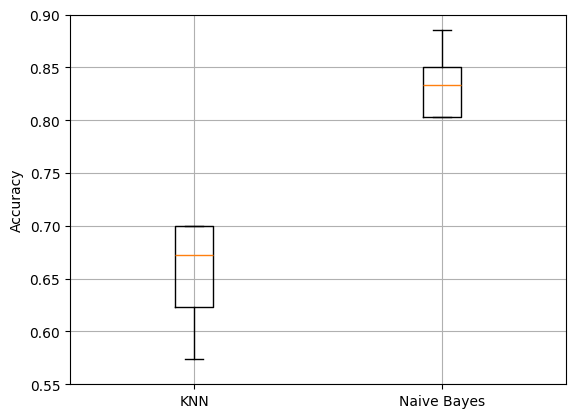

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('heart-disease.csv')
x = data.drop('target', axis=1)
y = data['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()

knn_scores = cross_val_score(knn, x, y, cv=skf, scoring='accuracy')
gnb_scores = cross_val_score(naive_bayes, x, y, cv=skf, scoring='accuracy')

plt.boxplot([knn_scores, gnb_scores])
plt.xticks([1, 2], ['KNN', 'Naive Bayes'])
plt.ylabel('Accuracy')
plt.ylim(0.55, 0.9)
plt.grid(True)
plt.show()



The stability of a model can be analyzed by comparing the spread (variance) of the accuracies. A model that is more stable would have a smaller spread, indicating that its performance doesn't vary much with changes in folds. Taking this into account, we can say that Naive Bayes is more stable. This could be due to the fact that it makes strong assumptions about the independence of features (like the Gaussian assumption) and is less sensitive to local variations in the data - it relies more on statistical properties of the dataset, unlike KNN that is more sensitive to local patterns, which leads to greater variability in performance. 


**b.** [1.0v] Report the accuracy of both models, this time scaling the data with a Min-Max scaler before training the models. Explain the impact that this preprocessing step has on the performance of each model, providing an explanation for the results.

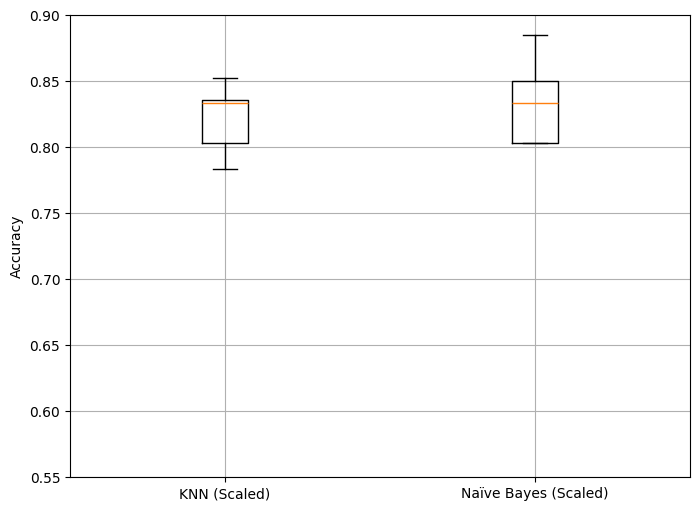

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')
gnb_scores_scaled = cross_val_score(naive_bayes, X_scaled, y, cv=cv, scoring='accuracy')

plt.figure(figsize=(8, 6))
plt.boxplot([knn_scores_scaled, gnb_scores_scaled], labels=['KNN (Scaled)', 'Naïve Bayes (Scaled)'])
plt.ylabel('Accuracy')
plt.ylim(0.55, 0.9)
plt.grid(True)
plt.show()


With scaling, there's an improved accuracy because now all features contribute equally to the distance computation.
KNN depends heavily on distance-based measures (e.g., Euclidean distance) and features with larger ranges dominate the distance calculations, so scaling ensures a more balanced comparison between features.

Without scaling, Naïve Bayes will perform similarly to how it does with scaling. This is because Naïve Bayes doesn’t rely on the distance between data points but rather on the distribution of each feature (mean and variance in the case of GaussianNB).


Min-Max scaling typically boosts KNN’s performance since it mitigates the effect of features with larger numerical ranges dominating the distance metric. This usually results in higher accuracy and more consistent performance across folds.

**c.** [1.0v] Using scipy, test the hypothesis “the model is statistically superior to 𝑘𝑁𝑁 naïve Bayes regarding accuracy”, asserting whether it is true.

In [46]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(knn_scores, gnb_scores)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=-6.690, p=0.003


explain p value ??????

**2)** Using a 80-20 train-test split, vary the number of neighbors of a classifier using 𝑘𝑁𝑁.Additionally, for each , train one classifier using uniform weights 𝑘 = {1, 5, 10, 20, 30} 𝑘 and distance weights. <br> <br>
**a.** [1.0v] Plot the train and test accuracy for each model.